In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns 
%matplotlib inline

df = pd.read_csv('penguins.csv')
df = df.dropna()
df = df[df['species'] != 'Adelie']
df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
152,Chinstrap,Dream,46.5,17.9,192.0,3500.0,FEMALE
153,Chinstrap,Dream,50.0,19.5,196.0,3900.0,MALE
154,Chinstrap,Dream,51.3,19.2,193.0,3650.0,MALE
155,Chinstrap,Dream,45.4,18.7,188.0,3525.0,FEMALE
156,Chinstrap,Dream,52.7,19.8,197.0,3725.0,MALE


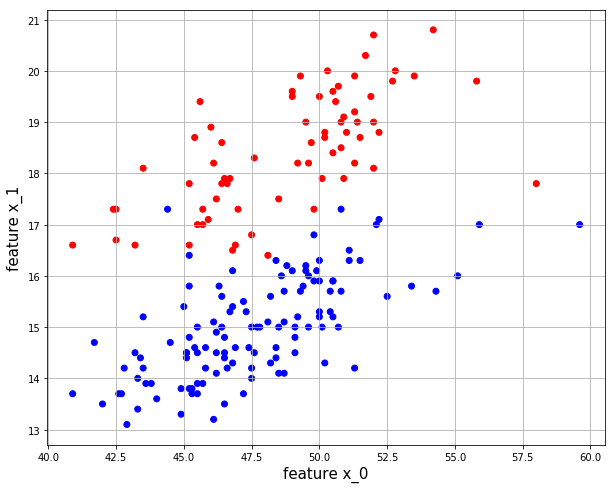

In [2]:
X = df.filter(['bill_length_mm','bill_depth_mm'], axis=1).values
y = df['species']
y = y.map(dict(Gentoo=1, Chinstrap=0)).values
colors = ["red" if label == 0 else "blue" for label in y]

plt.figure(figsize=(10, 8))
plt.scatter(X[:, 0], X[:, 1], c = colors)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid(True)
plt.show()

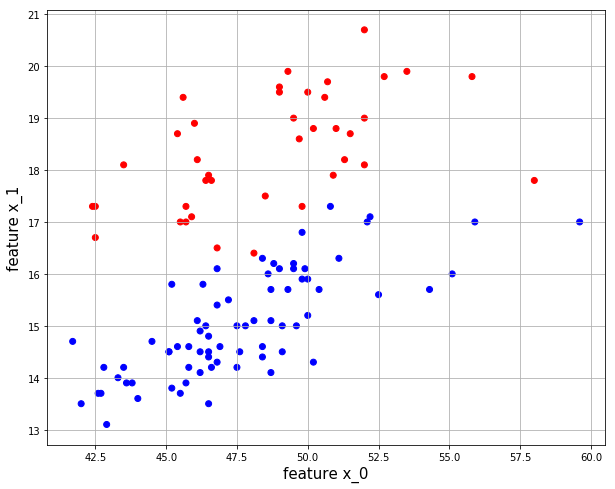

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

c_train = ["red" if label == 0 else "blue" for label in y_train]
c_test = ["red" if label == 0 else "blue" for label in y_test]

plt.figure(figsize=(10, 8))
plt.scatter(X_train[:, 0], X_train[:, 1], c = c_train)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

In [4]:
features = ["x_0", "x_1"]
labels = ["red", "blue"]

In [5]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

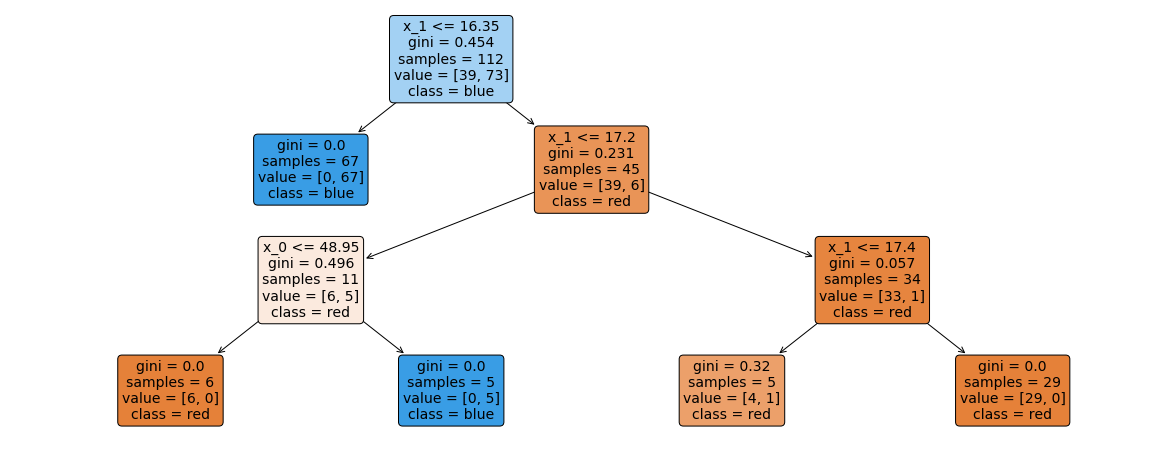

In [6]:
from sklearn import tree

plt.figure(figsize=(20, 8))
a = tree.plot_tree(decision_tree,
                   feature_names = features,
                   class_names = labels,
                   rounded = True,
                   filled = True, 
                   fontsize=14)
plt.show()

In [7]:
from sklearn.tree import export_text

tree_rules = export_text(decision_tree,
                         feature_names = features)
print(tree_rules)

|--- x_1 <= 16.35
|   |--- class: 1
|--- x_1 >  16.35
|   |--- x_1 <= 17.20
|   |   |--- x_0 <= 48.95
|   |   |   |--- class: 0
|   |   |--- x_0 >  48.95
|   |   |   |--- class: 1
|   |--- x_1 >  17.20
|   |   |--- x_1 <= 17.40
|   |   |   |--- class: 0
|   |   |--- x_1 >  17.40
|   |   |   |--- class: 0



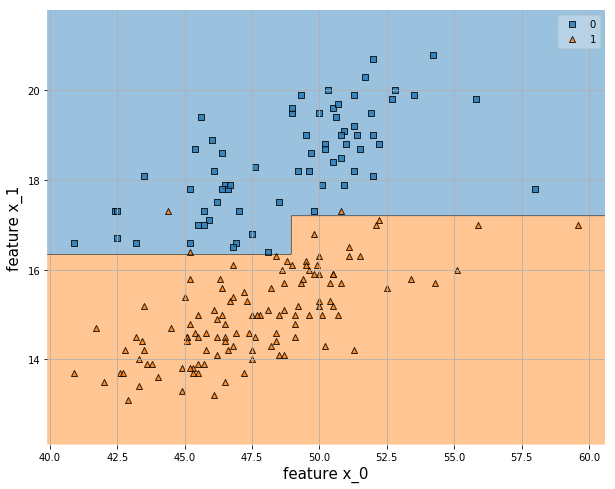

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = decision_tree)
plt.xlabel("feature x_0", fontsize = 15)
plt.ylabel("feature x_1", fontsize = 15)
plt.grid()
plt.show()

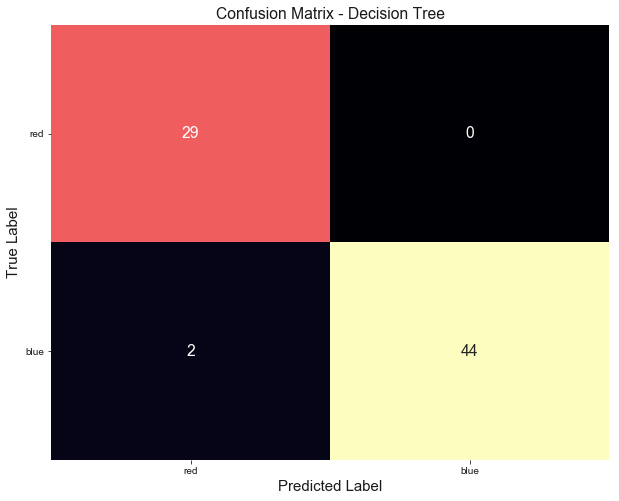

In [9]:
# predicted values on the testing data
test_pred_decision_tree = decision_tree.predict(X_test)

# Import metrics from sklearn 
from sklearn import metrics

# Note: visualizing your tree above will be weird after running seaborn
import seaborn as sns

# The confusion matrix
confusion_matrix = metrics.confusion_matrix(y_test, test_pred_decision_tree)

# Convert confusion matrix into dataframe
matrix_df = pd.DataFrame(confusion_matrix)


plt.figure(figsize=(10, 8))
ax = plt.axes()
sns.set(font_scale=1.3)

sns.heatmap(matrix_df,
            annot = True, 
            fmt = "g",
            ax = ax, 
            cmap = "magma", 
            cbar = False)

ax.set_title("Confusion Matrix - Decision Tree")
ax.set_xlabel("Predicted Label", fontsize=15)
ax.set_xticklabels(labels)
ax.set_ylabel("True Label", fontsize=15)
ax.set_yticklabels(labels, rotation=0)
plt.show()

In [10]:
from sklearn.metrics import classification_report

y_pred = decision_tree.predict(X_test)

#Checking performance our model with classification report.
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        29
           1       1.00      0.96      0.98        46

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.98      0.97      0.97        75

